In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('card_transdata.csv')

In [3]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [5]:
#There are total 8 features and 1000000records

In [5]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.isna().sum()/len(df)

distance_from_home                0.0
distance_from_last_transaction    0.0
ratio_to_median_purchase_price    0.0
repeat_retailer                   0.0
used_chip                         0.0
used_pin_number                   0.0
online_order                      0.0
fraud                             0.0
dtype: float64

In [8]:
#The dataset doesn't contain any null values

<AxesSubplot: xlabel='fraud', ylabel='count'>

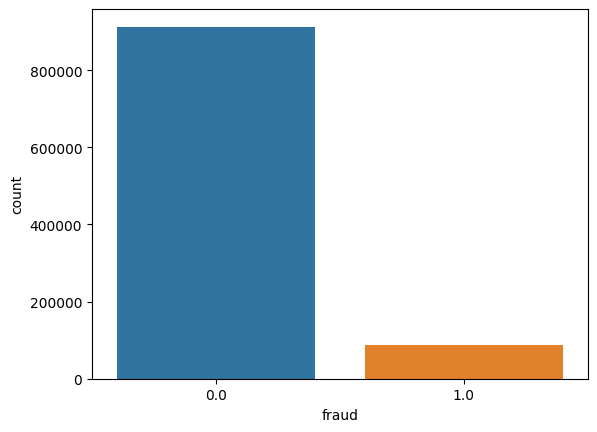

In [9]:
sns.countplot(x='fraud',data=df)

In [10]:
#The data is imbalance

fraud
0.0    912597
1.0     87403
dtype: int64

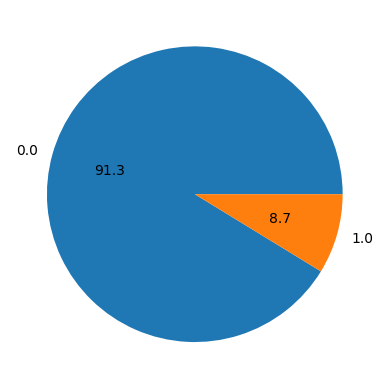

In [9]:
df.value_counts("fraud").plot.pie(autopct = "%.1f")
df.value_counts("fraud")

In [12]:
#There are of total 87403 fraud transaction of 1000000records that's almost 9%

<AxesSubplot: xlabel='fraud', ylabel='count'>

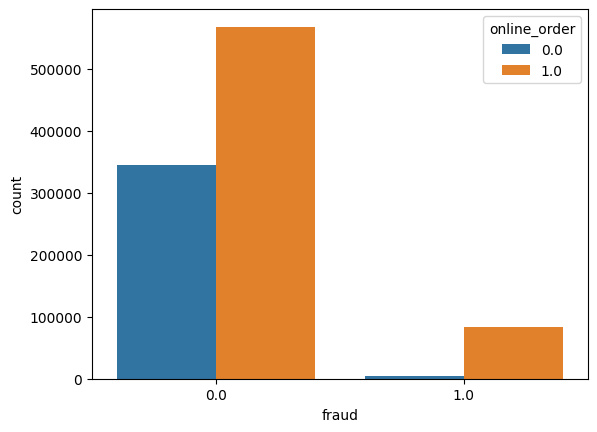

In [13]:
sns.countplot(x='fraud',data=df,hue='online_order')

In [14]:
df.nunique()

distance_from_home                1000000
distance_from_last_transaction    1000000
ratio_to_median_purchase_price    1000000
repeat_retailer                         2
used_chip                               2
used_pin_number                         2
online_order                            2
fraud                                   2
dtype: int64

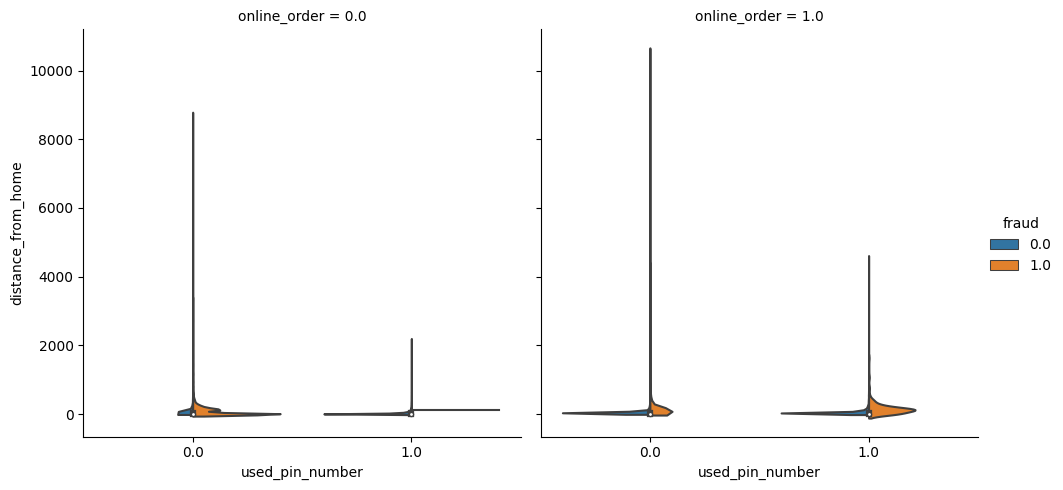

In [15]:
sns.catplot(data=df,x='used_pin_number',y='distance_from_home',hue='fraud',col='online_order',kind='violin',split=True)
plt.show()

In [16]:
#The fraud data has a very different distribution compare to genuine transaction

#Now lets take a look at a histogram of the ratio between the current purchase price and the customer's median purchase price

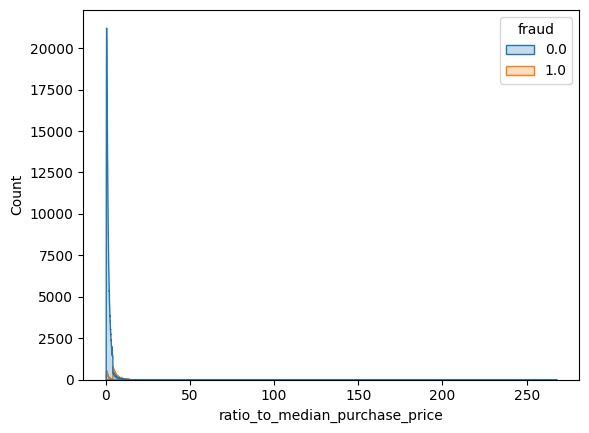

In [17]:
sns.histplot(data=df,x='ratio_to_median_purchase_price',hue='fraud',element='poly')
plt.show()

In [18]:
##After a certain point transactions begins to be more likely to be fraud

used_chip
0.0    649601
1.0    350399
dtype: int64

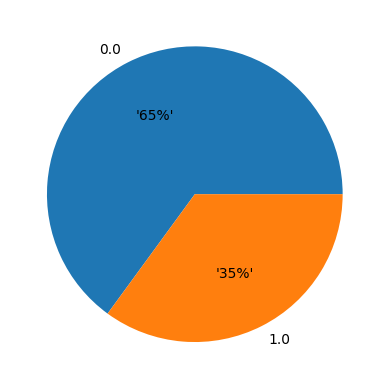

In [10]:
df.value_counts("used_chip").plot.pie(autopct = "'%1.0f%%'")
df.value_counts("used_chip")

In [ ]:
#SO total 35% transaction are through credit card

<AxesSubplot: xlabel='online_order', ylabel='fraud'>

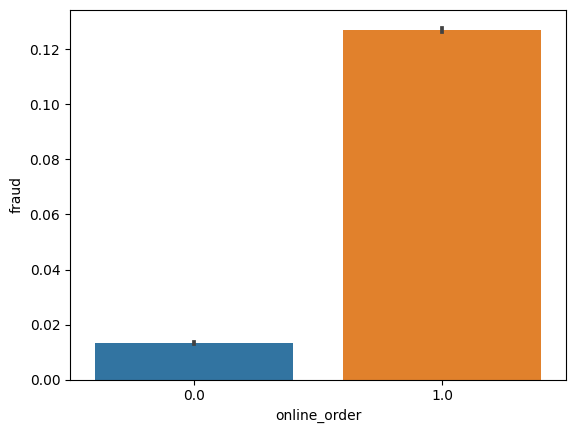

In [6]:
sns.barplot(data=df, x="online_order", y="fraud")

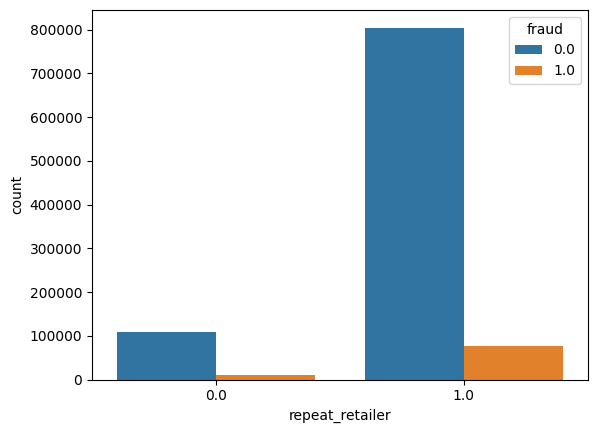

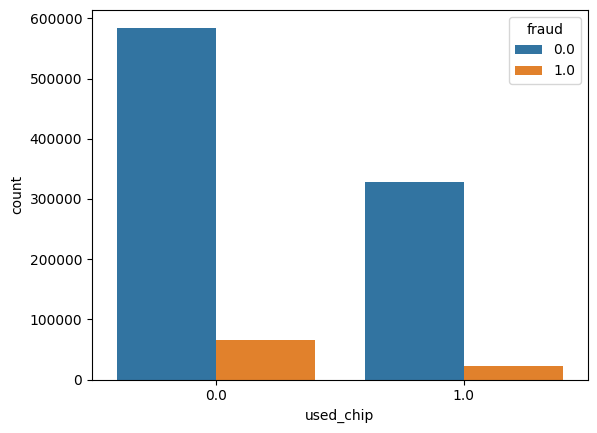

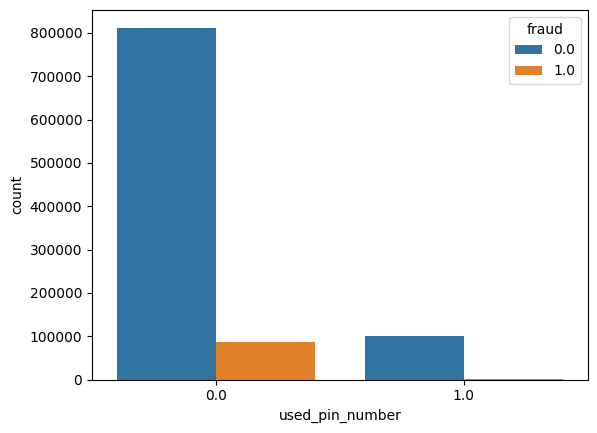

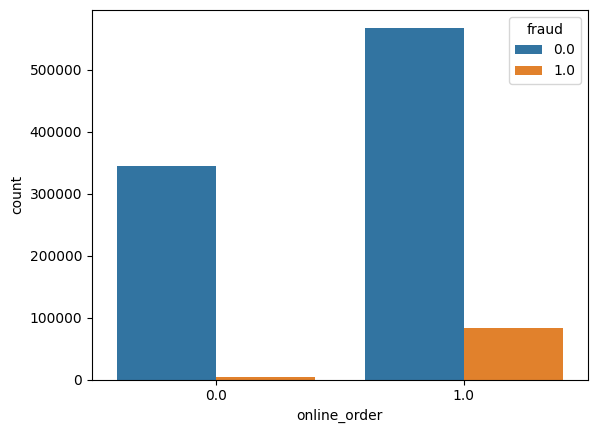

In [19]:
for col in ['repeat_retailer','used_chip','used_pin_number','online_order']:
    sns.countplot(data=df,x=col,hue='fraud')
    plt.show()

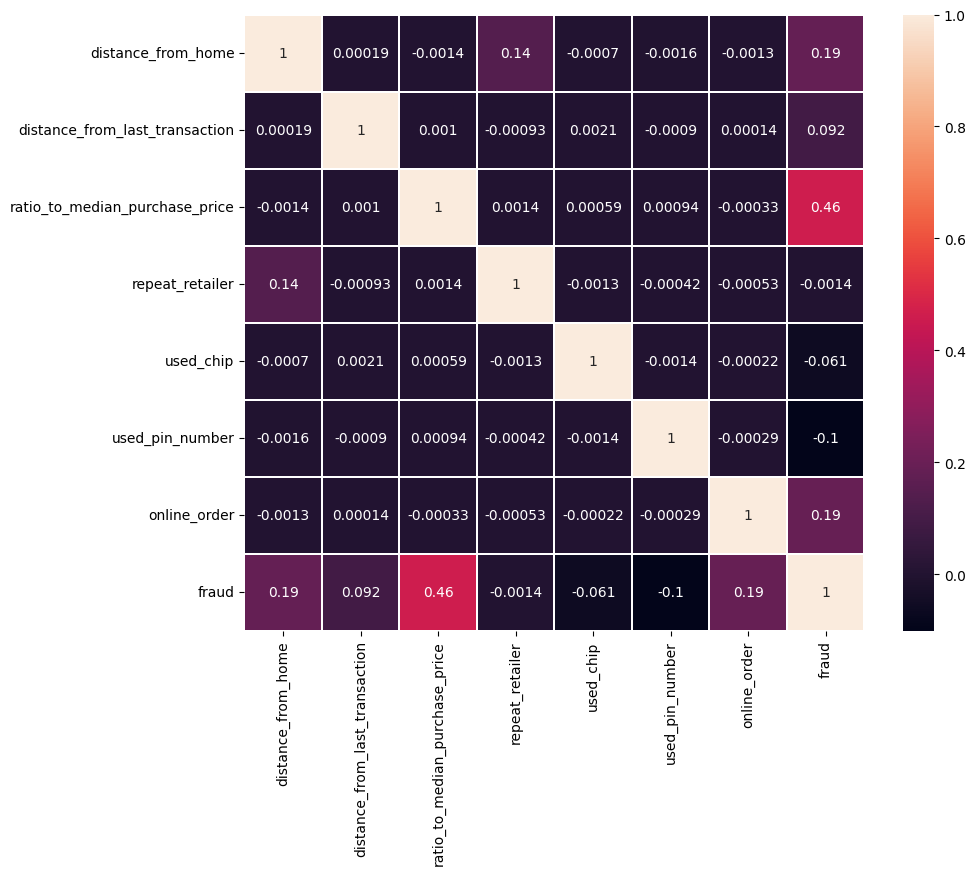

In [20]:
sns.heatmap(df.corr(),annot=True,linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

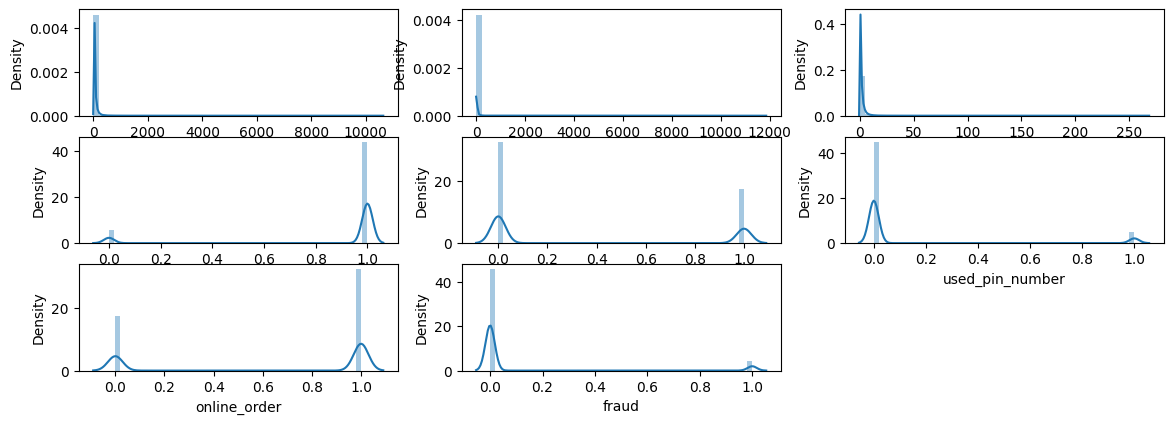

In [21]:
plt.figure(figsize=(14,8))
count=1
for i in df.columns:
    plt.subplot(5,3,count)
    sns.distplot(df[i])
    count+=1

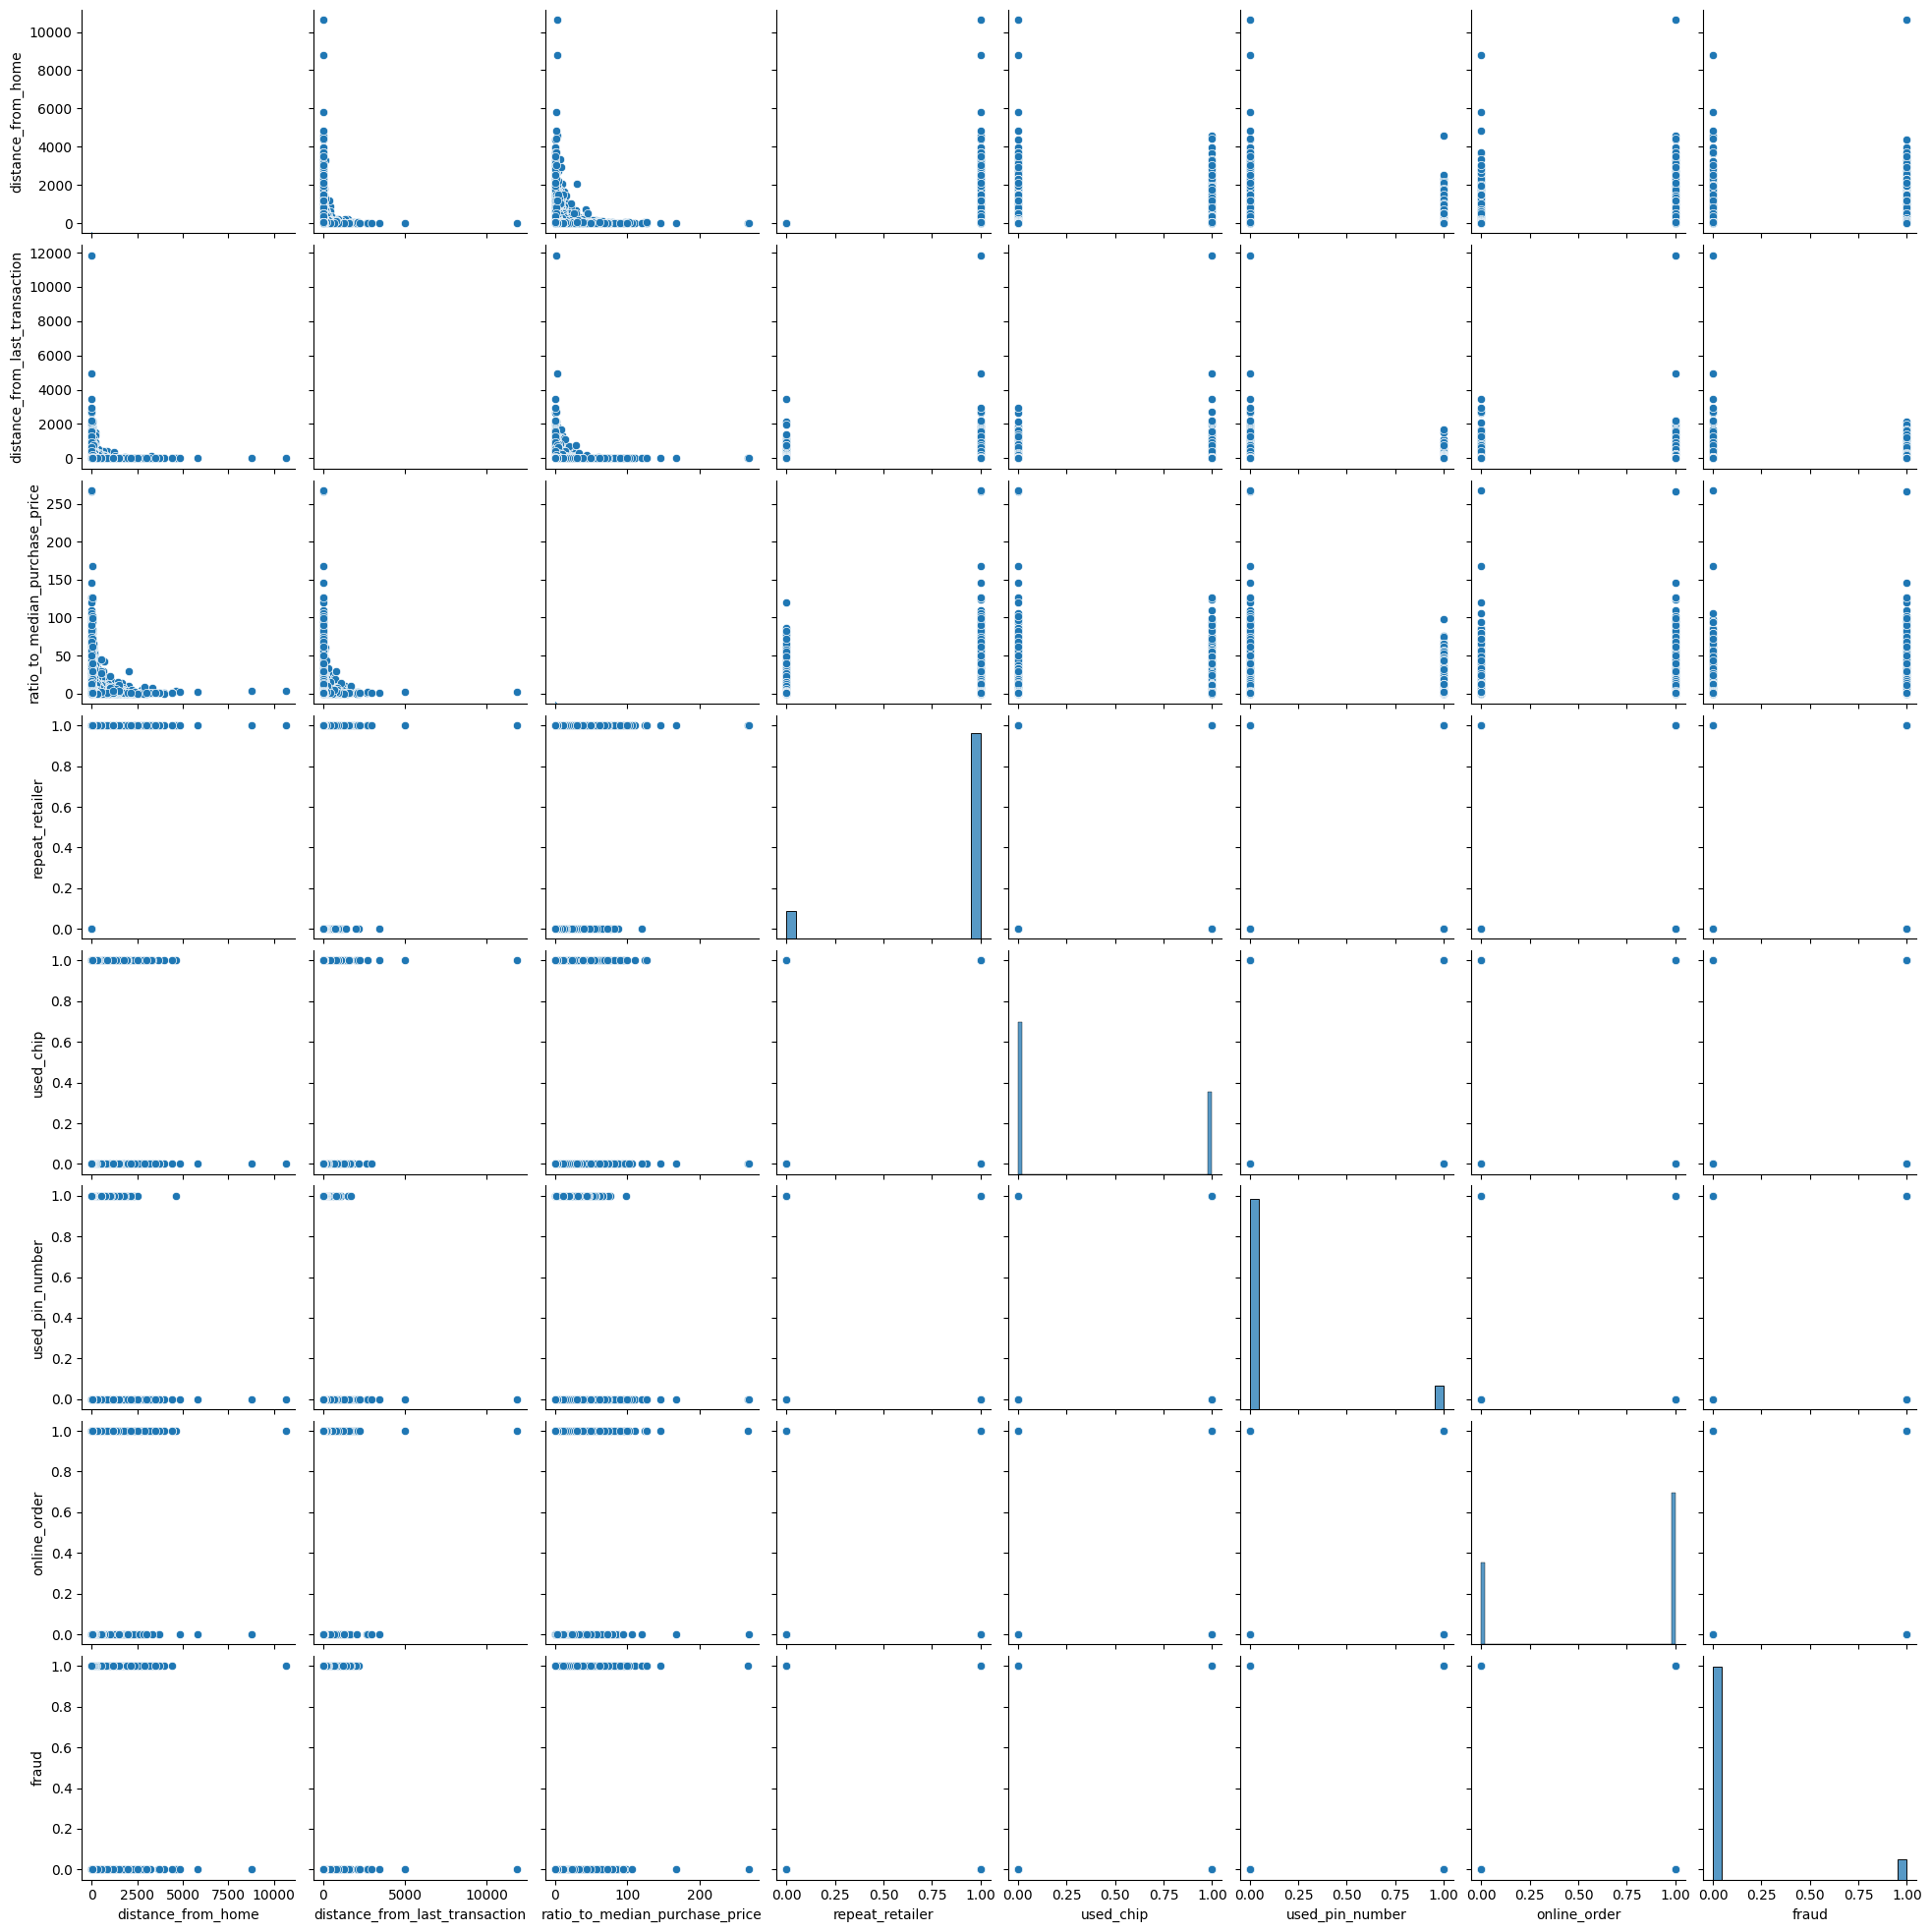

In [4]:
sns.pairplot(data=df)

In [4]:
from sklearn.model_selection import train_test_split
X=df.drop('fraud',axis=1)
y=df['fraud']

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

In [6]:
X_train.shape

(800000, 7)

In [7]:
X_test.shape

(200000, 7)

In [8]:
y_train.shape

(800000,)

In [9]:
y_test.shape

(200000,)

In [10]:
from sklearn.metrics import classification_report
def my_model(model):
    model.fit(X_train,y_train)
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)
    print("Train data")
    print(classification_report(y_train,y_pred_train))
    print("Test data")
    print(classification_report(y_test,y_pred_test))
    return model

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr=LogisticRegression()

In [31]:
my_model(lr)

Train data
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    729985
         1.0       0.88      0.58      0.70     70015

    accuracy                           0.96    800000
   macro avg       0.92      0.78      0.84    800000
weighted avg       0.95      0.96      0.95    800000

Test data
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182612
         1.0       0.88      0.59      0.70     17388

    accuracy                           0.96    200000
   macro avg       0.92      0.79      0.84    200000
weighted avg       0.95      0.96      0.95    200000



LogisticRegression()

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn=KNeighborsClassifier(n_neighbors=5)

In [34]:
my_model(knn)

Train data
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    729985
         1.0       0.94      0.96      0.95     70015

    accuracy                           0.99    800000
   macro avg       0.97      0.98      0.97    800000
weighted avg       0.99      0.99      0.99    800000

Test data
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    182612
         1.0       0.89      0.93      0.91     17388

    accuracy                           0.98    200000
   macro avg       0.94      0.96      0.95    200000
weighted avg       0.98      0.98      0.98    200000



KNeighborsClassifier()

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dt=DecisionTreeClassifier(max_depth=5)

In [21]:
my_model(dt)

Train data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    729985
         1.0       0.99      1.00      0.99     70015

    accuracy                           1.00    800000
   macro avg       0.99      1.00      1.00    800000
weighted avg       1.00      1.00      1.00    800000

Test data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182612
         1.0       0.99      1.00      0.99     17388

    accuracy                           1.00    200000
   macro avg       0.99      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



DecisionTreeClassifier(max_depth=5)

In [38]:
from sklearn.metrics import accuracy_score
for i in range(1,15):
    dt=DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train,y_train)
    y_pred_train=dt.predict(X_train)
    y_pred_test=dt.predict(X_test)
    print("Train data/max depth=",i)
    print(accuracy_score(y_train,y_pred_train))
    print("Test data")
    print(accuracy_score(y_test,y_pred_test))

Train data/max depth= 1
0.93915375
Test data
0.94009
Train data/max depth= 2
0.9664675
Test data
0.967025
Train data/max depth= 3
0.979415
Test data
0.97953
Train data/max depth= 4
0.99231625
Test data
0.992735
Train data/max depth= 5
0.99874875
Test data
0.99872
Train data/max depth= 6
0.99994625
Test data
0.99994
Train data/max depth= 7
1.0
Test data
0.999975
Train data/max depth= 8
1.0
Test data
0.999975
Train data/max depth= 9
1.0
Test data
0.999995
Train data/max depth= 10
1.0
Test data
0.999995
Train data/max depth= 11
1.0
Test data
0.999975
Train data/max depth= 12
1.0
Test data
0.999975
Train data/max depth= 13
1.0
Test data
0.999995
Train data/max depth= 14
1.0
Test data
0.999995


In [22]:
dt=DecisionTreeClassifier(max_depth=3)
my_model(dt)

Train data
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    729985
         1.0       0.87      0.90      0.88     70015

    accuracy                           0.98    800000
   macro avg       0.93      0.94      0.94    800000
weighted avg       0.98      0.98      0.98    800000

Test data
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    182612
         1.0       0.86      0.91      0.89     17388

    accuracy                           0.98    200000
   macro avg       0.93      0.95      0.94    200000
weighted avg       0.98      0.98      0.98    200000



DecisionTreeClassifier(max_depth=3)

In [39]:
from sklearn import tree

In [40]:
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

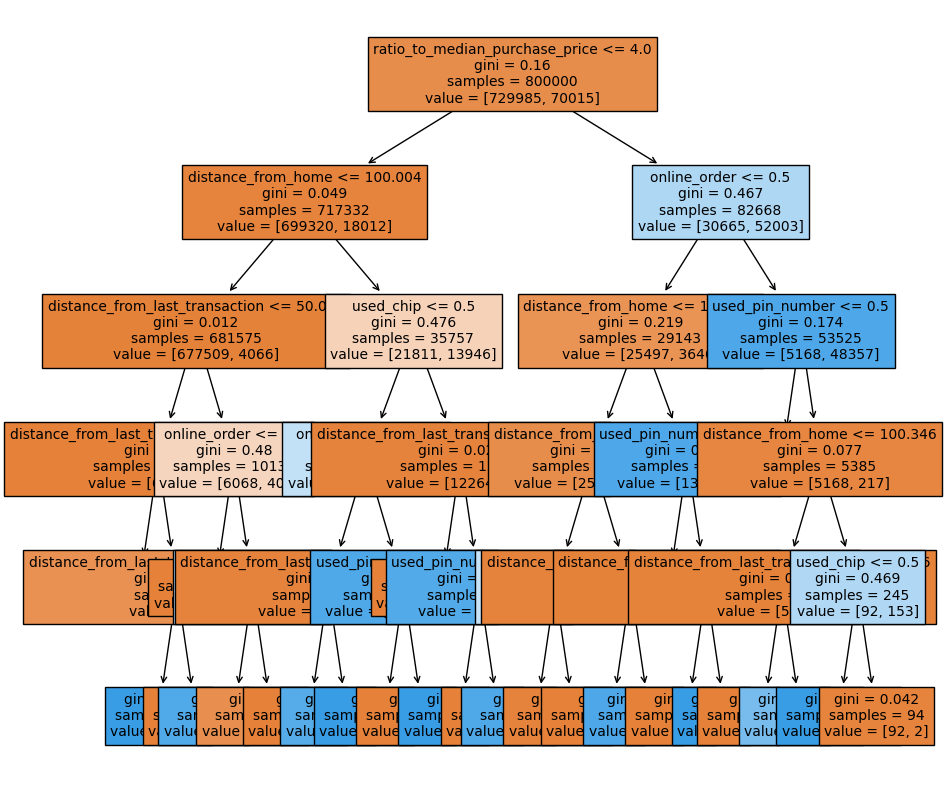

In [41]:
fig,ax=plt.subplots(figsize=(10,10))
chart=tree.plot_tree(dt,max_depth=5,feature_names=X.columns,filled=True,fontsize=10)

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10)
my_model(rf)

Train data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    729985
         1.0       1.00      1.00      1.00     70015

    accuracy                           1.00    800000
   macro avg       1.00      1.00      1.00    800000
weighted avg       1.00      1.00      1.00    800000

Test data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182612
         1.0       1.00      1.00      1.00     17388

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



RandomForestClassifier(n_estimators=10)

In [18]:
from sklearn.ensemble import AdaBoostClassifier

In [19]:
ada=AdaBoostClassifier()

In [20]:
my_model(ada)

Train data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    729985
         1.0       1.00      1.00      1.00     70015

    accuracy                           1.00    800000
   macro avg       1.00      1.00      1.00    800000
weighted avg       1.00      1.00      1.00    800000

Test data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182612
         1.0       1.00      1.00      1.00     17388

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



AdaBoostClassifier()

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
gb=GradientBoostingClassifier()

In [66]:
my_model(gb)

Train data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    729985
         1.0       1.00      1.00      1.00     70015

    accuracy                           1.00    800000
   macro avg       1.00      1.00      1.00    800000
weighted avg       1.00      1.00      1.00    800000

Test data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182612
         1.0       1.00      1.00      1.00     17388

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



GradientBoostingClassifier()

In [12]:
from sklearn.model_selection import RandomizedSearchCV


In [47]:
param_grid={'criterion':['gini','entropy'],
           'max_depth':np.arange(3,51),
           'min_samples_split':np.arange(1,51),
           'min_samples_leaf':np.arange(1,51),
           'max_features':['log','auto',None]}

In [48]:
tree_cv=RandomizedSearchCV(rf,param_grid,scoring='f1',cv=5,n_jobs=-1)

In [49]:
tree_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=10),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                                        'max_features': ['log', 'auto', None],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                                        'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
                   scoring='f1')

In [50]:
my_model(tree_cv)

Train data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    729985
         1.0       1.00      1.00      1.00     70015

    accuracy                           1.00    800000
   macro avg       1.00      1.00      1.00    800000
weighted avg       1.00      1.00      1.00    800000

Test data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182612
         1.0       1.00      1.00      1.00     17388

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=10),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                                        'max_features': ['log', 'auto', None],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                                        'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
                   scoring='f1')

In [51]:
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': None, 'max_depth': 38, 'criterion': 'entropy'}
Best score is 0.9998714474461374


In [13]:
param_grid={'n_estimators':[100,200,300,400],
           'criterion':['gini','entropy'],
           'max_depth':np.arange(1,20),
           'min_samples_split':[5,10,15,20,25,30,35,40],}

In [14]:
trees_cv=RandomizedSearchCV(rf,param_grid,scoring='f1',cv=5,n_jobs=-1)

In [ ]:
trees_cv.fit(X_train,y_train)

In [15]:
my_model(trees_cv)

Train data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    729985
         1.0       1.00      1.00      1.00     70015

    accuracy                           1.00    800000
   macro avg       1.00      1.00      1.00    800000
weighted avg       1.00      1.00      1.00    800000

Test data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182612
         1.0       1.00      1.00      1.00     17388

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=10),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': [5, 10, 15, 20, 25,
                                                              30, 35, 40],
                                        'n_estimators': [100, 200, 300, 400]},
                   scoring='f1')

In [67]:
data={'models':['LogisticRegression','KneighboursClassifier','DecisionTreeClassifeir','RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier'],
     'Train accuracy':[0.92,0.97,0.93,1.0,1.0,1.0],
     'Test accuracy':[0.92,0.94,0.93,1.0,1.0,1.0]}
df1=pd.DataFrame(data)

In [68]:
df1

,models,Train accuracy,Test accuracy
0,LogisticRegression,0.92,0.92
1,KneighboursClassifier,0.97,0.94
2,DecisionTreeClassifeir,0.93,0.93
3,RandomForestClassifier,1.00,1.00
4,AdaBoostClassifier,1.00,1.00
5,GradientBoostingClassifier,1.00,1.00


# From the above model we can see that the model gives perfect Accuracy score Logistic Regression and Knn classifier than the rest of the model